## Image Classification

A small program to classify image quality from user input

#### Steps:

<div> 
&#8211; Load all images <br>
&#8211; Find first non-classified image <br>
&#8211; Show user image <br>
&#8211; User inputs number 1 to 5 based on image quality <br>
&#8211; Show user next image <br>
</div>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
from py_files import load_data, bird_info, const
import warnings
warnings.filterwarnings('ignore')

2022-05-05 17:00:58.335256: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-05 17:00:58.335278: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [10]:
images, labels = load_data.load_data_from_folder("birds")

Loading images....
0_common_blackbird
1_house_sparrow
2_great_tit
3_wood_pigeon
4_europen_robin
5_eurasian_magpie
6_eurasian_blue_tit
7_common_starling
8_european_goldfinch
9_long_tailed_tit


In [11]:
# Load numpy array holding previous image classifications
image_quality = np.load('image_quality_dir/all_birds_temp.npy', allow_pickle=True)

In [12]:
# 0 indicates bird hasn't been classified. Loop over array until first non-classified bird has been found
index = 0
while(index < 2999 and image_quality[index] !=0):
    index=index+1

In [13]:
# Method to show image of bird plus the species name
def get_image(n_index):
    plt.imshow(images[n_index])
    name_index= 0 if index<=0 else math.floor((n_index)/300) 
    plt.title(const.COMMON_NAMES[name_index])
    plt.show()

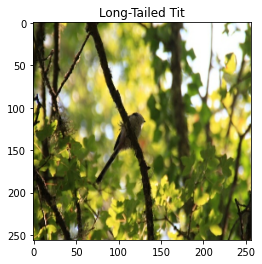

Rate image quality:
 1:Excellent
 2:Good
 3:Average
 4:Poor 
 5:Very Poor
 0:Quit 0


Images saved to numpy file


In [24]:
invlaid_message = "Invalid input - Please enter a number from one to five"
while(True):
    get_image(index)
    inp=input("Rate image quality:\n 1:Excellent\n 2:Good\n 3:Average\n 4:Poor \n 5:Very Poor\n 0:Quit")
    try:
        inp=int(inp)
        if(index >= 2999 or inp==0):
            np.save("image_quality_dir/all_birds_temp.npy", image_quality)
            print("Images saved to numpy file")
            break
        elif inp > 5 or inp < 0:
            print(invlaid_message)
        else:
            image_quality[index]=inp
            index+=1
    except: 
        print(invlaid_message)
    
              